In [31]:
## 모듈 임포트
from keras.datasets import imdb
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [2]:
## 데이터정리

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=5000)

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

# 훈련 데이터를 벡터로 변환합니다
X_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
X_test = vectorize_sequences(test_data)
# 레이블을 벡터로 변환합니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
y_train = y_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

In [3]:
## 네트워크 생성(모델생성)
input_shape = X_train.shape[1] 
output_shape = y_train.shape[1]
original_model = Sequential()
original_model.add(Dense(16,activation='relu',input_shape=(input_shape,)))
original_model.add(Dense(16,activation='relu'))
original_model.add(Dense(output_shape,activation='sigmoid'))

2022-05-04 00:16:35.486353: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-04 00:16:35.487397: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [4]:
## 모델설정
optimizer="rmsprop"
loss="binary_crossentropy"
metrics=["accuracy"]
original_model.compile(optimizer=optimizer,
                      loss=loss,
                      metrics=metrics)

In [5]:
## 모델학습 및 평가
epochs=20
batch_size=512
validation_data=(X_test,y_test)
original_model.fit(X_train,y_train,
                  epochs=epochs,
                  batch_size=batch_size,
                  validation_data=validation_data)

2022-05-04 00:16:41.052331: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
49/49 [==============================] - 2s 35ms/step - loss: 0.4517 - accuracy: 0.8206 - val_loss: 0.3319 - val_accuracy: 0.8793
Epoch 2/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2792 - accuracy: 0.8980 - val_loss: 0.2940 - val_accuracy: 0.8832
Epoch 3/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2311 - accuracy: 0.9137 - val_loss: 0.2964 - val_accuracy: 0.8797
Epoch 4/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2077 - accuracy: 0.9206 - val_loss: 0.2979 - val_accuracy: 0.8806
Epoch 5/20
49/49 [==============================] - 1s 23ms/step - loss: 0.1917 - accuracy: 0.9290 - val_loss: 0.3378 - val_accuracy: 0.8677
Epoch 6/20
49/49 [==============================] - 1s 23ms/step - loss: 0.1797 - accuracy: 0.9308 - val_loss: 0.3228 - val_accuracy: 0.8743
Epoch 7/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1720 - accuracy: 0.9353 - val_loss: 0.3370 - val_accuracy: 0.8719
Epoch 8/20
49

In [12]:
## 모델활용
import matplotlib.pyplot as plt
original_model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

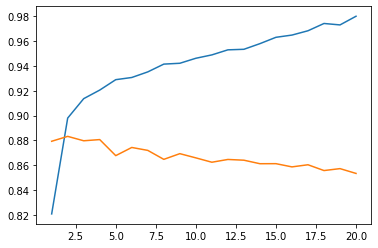

In [16]:
plt.plot(range(1,21),original_model.history.history['accuracy'])
plt.plot(range(1,21),original_model.history.history['val_accuracy'])
plt.show()

In [17]:
small_model = Sequential()
small_model.add(Dense(6,activation='relu',input_shape=(input_shape,)))
small_model.add(Dense(6,activation='relu'))
small_model.add(Dense(output_shape,activation='sigmoid'))

In [18]:
optimizer="rmsprop"
loss="binary_crossentropy"
metrics=["accuracy"]
small_model.compile(optimizer=optimizer,
                      loss=loss,
                      metrics=metrics)

In [19]:
epochs=20
batch_size=512
validation_data=(X_test,y_test)
small_model.fit(X_train,y_train,
                  epochs=epochs,
                  batch_size=batch_size,
                  validation_data=validation_data)

Epoch 1/20
49/49 [==============================] - 2s 28ms/step - loss: 0.5365 - accuracy: 0.7863 - val_loss: 0.4350 - val_accuracy: 0.8655
Epoch 2/20
49/49 [==============================] - 1s 18ms/step - loss: 0.3561 - accuracy: 0.8885 - val_loss: 0.3319 - val_accuracy: 0.8828
Epoch 3/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2757 - accuracy: 0.9074 - val_loss: 0.2969 - val_accuracy: 0.8857
Epoch 4/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2378 - accuracy: 0.9163 - val_loss: 0.2845 - val_accuracy: 0.8857
Epoch 5/20
49/49 [==============================] - 1s 18ms/step - loss: 0.2137 - accuracy: 0.9228 - val_loss: 0.2847 - val_accuracy: 0.8846
Epoch 6/20
49/49 [==============================] - 1s 20ms/step - loss: 0.1973 - accuracy: 0.9289 - val_loss: 0.2873 - val_accuracy: 0.8828
Epoch 7/20
49/49 [==============================] - 1s 22ms/step - loss: 0.1857 - accuracy: 0.9323 - val_loss: 0.2956 - val_accuracy: 0.8824
Epoch 8/20
49

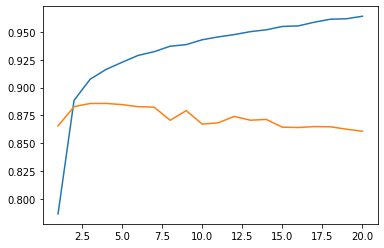

In [21]:
plt.plot(range(1,21),small_model.history.history['accuracy'])
plt.plot(range(1,21),small_model.history.history['val_accuracy'])
plt.show()

In [23]:
from keras import regularizers

In [26]:
from keras.regularizers import l1, l2

In [27]:
l1_model = Sequential()
l1_model.add(Dense(16,activation='relu',kernel_regularizer=l2(0.001),input_shape=(input_shape,)))
l1_model.add(Dense(16,activation='relu',kernel_regularizer=l2(0.001)))
l1_model.add(Dense(output_shape,activation='sigmoid'))

In [28]:
optimizer="rmsprop"
loss="binary_crossentropy"
metrics=["accuracy"]
l1_model.compile(optimizer=optimizer,
                      loss=loss,
                      metrics=metrics)

In [29]:
epochs=20
batch_size=512
validation_data=(X_test,y_test)
l1_model.fit(X_train,y_train,
                  epochs=epochs,
                  batch_size=batch_size,
                  validation_data=validation_data)

Epoch 1/20
49/49 [==============================] - 6s 107ms/step - loss: 0.5032 - accuracy: 0.8184 - val_loss: 0.3933 - val_accuracy: 0.8728
Epoch 2/20
49/49 [==============================] - 1s 21ms/step - loss: 0.3340 - accuracy: 0.8930 - val_loss: 0.3363 - val_accuracy: 0.8844
Epoch 3/20
49/49 [==============================] - 1s 24ms/step - loss: 0.2883 - accuracy: 0.9083 - val_loss: 0.3233 - val_accuracy: 0.8871
Epoch 4/20
49/49 [==============================] - 1s 20ms/step - loss: 0.2702 - accuracy: 0.9142 - val_loss: 0.3253 - val_accuracy: 0.8860
Epoch 5/20
49/49 [==============================] - 1s 20ms/step - loss: 0.2574 - accuracy: 0.9190 - val_loss: 0.3329 - val_accuracy: 0.8829
Epoch 6/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2511 - accuracy: 0.9210 - val_loss: 0.3484 - val_accuracy: 0.8778
Epoch 7/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2483 - accuracy: 0.9238 - val_loss: 0.3447 - val_accuracy: 0.8800
Epoch 8/20
4

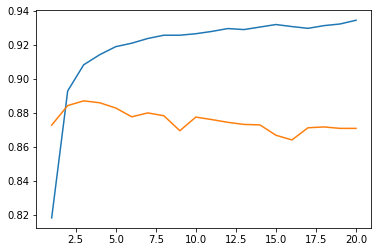

In [30]:
plt.plot(range(1,21),l1_model.history.history['accuracy'])
plt.plot(range(1,21),l1_model.history.history['val_accuracy'])
plt.show()

In [40]:
drout_model = Sequential()
drout_model.add(Dense(16,activation='relu',input_shape=(input_shape,)))
drout_model.add(Dropout(0.5))
drout_model.add(Dense(16,activation='relu'))
drout_model.add(Dropout(0.5))
drout_model.add(Dense(output_shape,activation='sigmoid'))

In [41]:
optimizer="rmsprop"
loss="binary_crossentropy"
metrics=["accuracy"]
drout_model.compile(optimizer=optimizer,
                      loss=loss,
                      metrics=metrics)

In [42]:
epochs=20
batch_size=512
validation_data=(X_test,y_test)
drout_model.fit(X_train,y_train,
                  epochs=epochs,
                  batch_size=batch_size,
                  validation_data=validation_data)

Epoch 1/20
49/49 [==============================] - 4s 65ms/step - loss: 0.6249 - accuracy: 0.6481 - val_loss: 0.5028 - val_accuracy: 0.8518
Epoch 2/20
49/49 [==============================] - 1s 20ms/step - loss: 0.5008 - accuracy: 0.7832 - val_loss: 0.3861 - val_accuracy: 0.8771
Epoch 3/20
49/49 [==============================] - 1s 19ms/step - loss: 0.4178 - accuracy: 0.8362 - val_loss: 0.3213 - val_accuracy: 0.8844
Epoch 4/20
49/49 [==============================] - 1s 21ms/step - loss: 0.3569 - accuracy: 0.8641 - val_loss: 0.2924 - val_accuracy: 0.8860
Epoch 5/20
49/49 [==============================] - 1s 22ms/step - loss: 0.3226 - accuracy: 0.8820 - val_loss: 0.2808 - val_accuracy: 0.8858
Epoch 6/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2888 - accuracy: 0.8921 - val_loss: 0.2822 - val_accuracy: 0.8842
Epoch 7/20
49/49 [==============================] - 1s 20ms/step - loss: 0.2678 - accuracy: 0.9030 - val_loss: 0.2853 - val_accuracy: 0.8814
Epoch 8/20
49

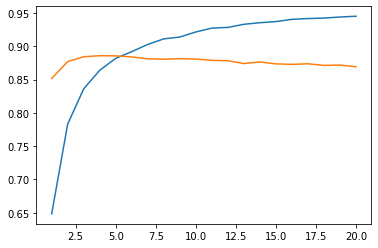

In [43]:
plt.plot(range(1,21),drout_model.history.history['accuracy'])
plt.plot(range(1,21),drout_model.history.history['val_accuracy'])
plt.show()